# Sales Prediction Using Python

In this task, the primary aim for me is to train a machine learning algorithm with a sales report data set, by which I can use to predict the future sales price values with an assumption of previous sales data.

This is my third task in Oasis Infobyte and second task where I use machine learning algorithm / models to train a program from a data set.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('./Advertising[1].csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Missing Values

In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

No missing values found

## Data Analysis

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

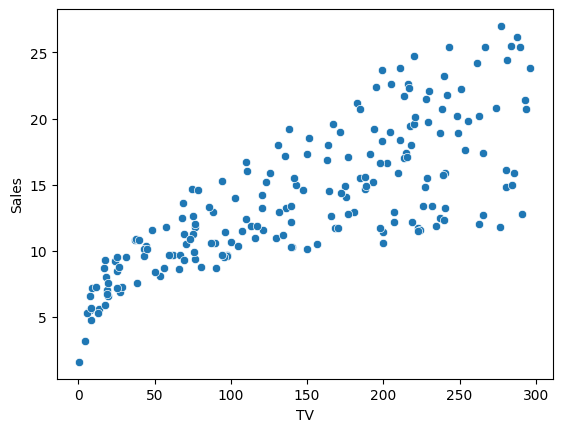

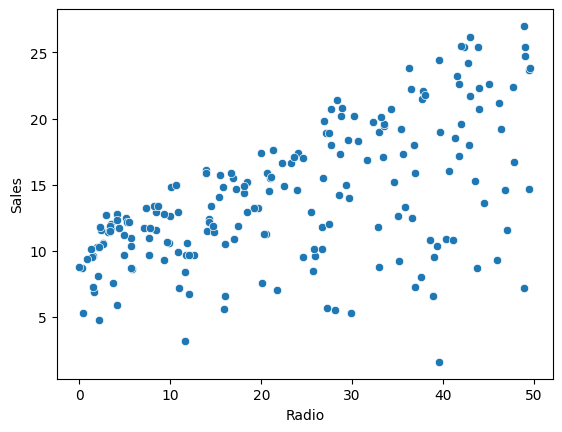

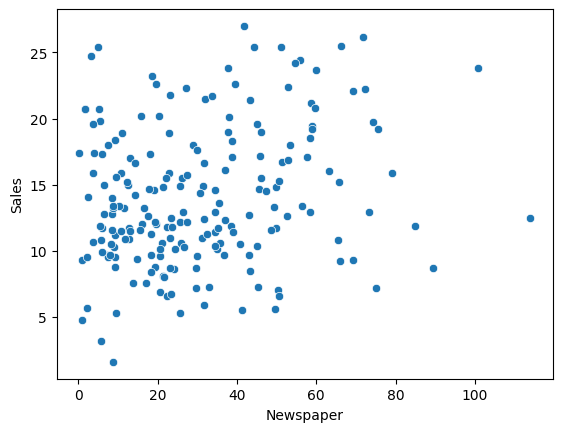

In [ ]:
for x in ['TV','Radio','Newspaper']:
  sns.scatterplot(x=data[x],y=data['Sales'])
  plt.show()

We could see that TV and Radio have high correlation with sales than newspaper

<Axes: >

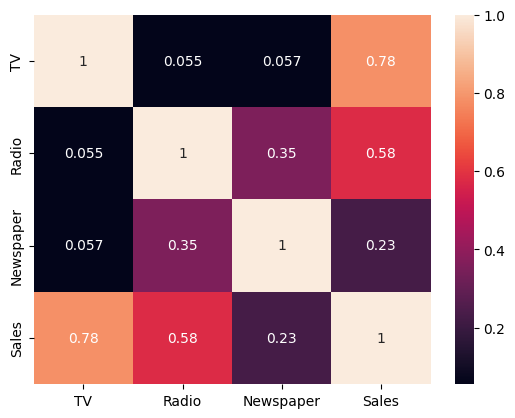

In [ ]:
sns.heatmap(data.corr(),annot=True)

# Data Processing

In [ ]:
import numpy as np

### 1. Outliers

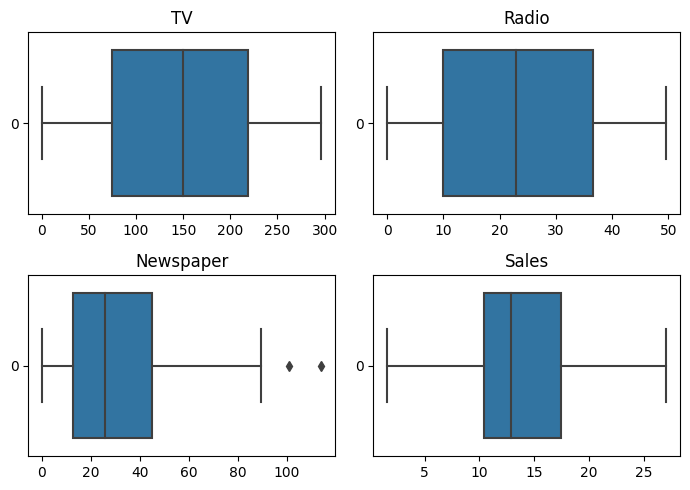

In [ ]:
plt.figure(figsize=(7,5))
col=list(data.columns)
for i in range(4):
  plt.subplot(2,2,i+1)
  sns.boxplot(data[col[i]],orient='h')
  plt.title(col[i])
plt.tight_layout()
plt.show()

Here the Newspaper column chart has outliers

In [26]:
q1=np.percentile(data['Newspaper'],25)  #removing outliers
q3=np.percentile(data['Newspaper'],75)
iqr=q3-q1

upper=q3+(1.5*iqr)

data=data[data['Newspaper']<upper]

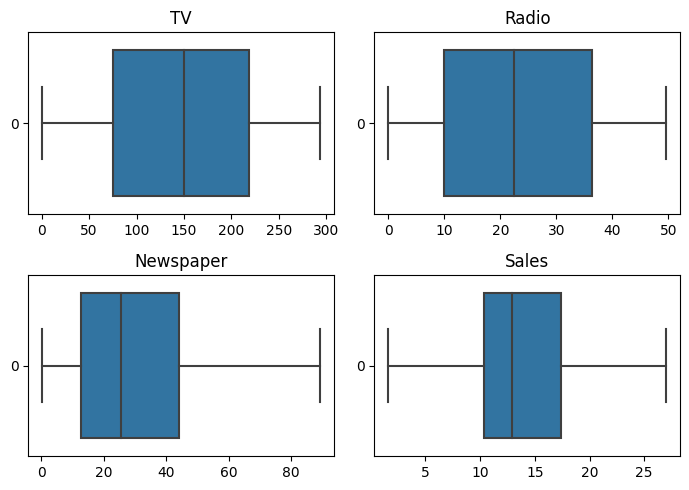

In [27]:
plt.figure(figsize=(7,5))
col=list(data.columns)
for i in range(4):
        plt.subplot(2,2,i+1)
        sns.boxplot(data[col[i]],orient='h')
        plt.title(col[i])
plt.tight_layout()
plt.show()

# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

X=data.drop(['Sales'],axis=1)
y=data['Sales']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

## Model Training

### 1. Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear=LinearRegression()
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)
print("R2 Score: {:.5f}".format(r2_score(y_test,y_pred)))

R2 Score: 0.91692


### Ridge Regression

In [30]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
print("R2 Score: {:.5f}".format(r2_score(y_test,y_pred)))

R2 Score: 0.91692


### 3. Lasso Regression

In [31]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)
print("R2 Score: {:.5f}".format(r2_score(y_test,y_pred)))

R2 Score: 0.91844


### Predictor Model

In [32]:
x_data=[]
for feature in ['TV','Radio','Newspaper']:
    x_data.append(float(input(feature+': ')))

print('predicted Sales(linear): {:.2f}'.format(linear.predict([x_data])[0]))
print('predicted Sales(ridge): {:.2f}'.format(ridge.predict([x_data])[0]))
print('predicted Sales(lasso): {:.2f}'.format(lasso.predict([x_data])[0]))

TV: 75
Radio: 75
Newspaper: 75
predicted Sales(linear): 20.82
predicted Sales(ridge): 20.82
predicted Sales(lasso): 20.55


# Conclusion:

From this observation, we could derive an inference that Lasso Regression Model has higher R2 score of 0.91844